<a href="https://colab.research.google.com/github/Git-Hub-Pro/Kalmanfilter/blob/master/moving_average_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive/') # '/content/gdrive/My Drive/data/kalmanfilter/source/2.MovAvgFilter/

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io

In [0]:
input_mat = io.loadmat('/content/gdrive/My Drive/data/kalmanfilter/source/2.MovAvgFilter/SonarAlt.mat')

In [8]:
print(input_mat)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Thu Feb 25 13:19:03 2010', '__version__': '1.0', '__globals__': [], 'sonarAlt': array([[34.25491256, 33.60223519, 33.60223519, ..., 36.55540305,
        36.55540305, 36.55540305]])}


In [0]:
def get_sonar(i):
    z = input_mat['sonarAlt'][0][i]
    return z

In [0]:
def mov_avg_filter(x_n,x_meas):
    n = len(x_n)
    for i in range(n-1):
        x_n[i] = x_n[i+1]
    x_n[n-1]  = x_meas
    x_avg = np.mean(x_n)
    return x_avg, x_n

In [0]:
# Input parameters.
n = 20
n_samples = 500
time_end = 10

In [0]:
dt = time_end / n_samples
time = np.arange(0,time_end,dt)
x_meas_save = np.zeros(n_samples)
x_avg_save = np.zeros(n_samples)

In [0]:
for i in range(n_samples):
    x_meas = get_sonar(i)
    if i==0:
       x_avg, x_n = x_meas, x_meas*np.ones(n)
    else:
        x_avg, x_n = mov_avg_filter(x_n,x_meas)

    x_meas_save[i] = x_meas
    x_avg_save[i] = x_avg

Text(0, 0.5, 'Altitude [m]')

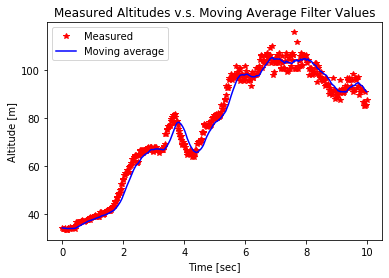

In [19]:
plt.plot(time,x_meas_save,'r*',label='Measured')
plt.plot(time,x_avg_save,'b-',label='Moving average')
plt.legend(loc='upper left')
plt.title('Measured Altitudes v.s. Moving Average Filter Values')
plt.xlabel('Time [sec]')
plt.ylabel('Altitude [m]')